In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [273]:
df = pd.read_csv('50_Startups.csv')

In [274]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [276]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [277]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [278]:
df.duplicated().sum()

0

<Axes: xlabel='State', ylabel='Marketing Spend'>

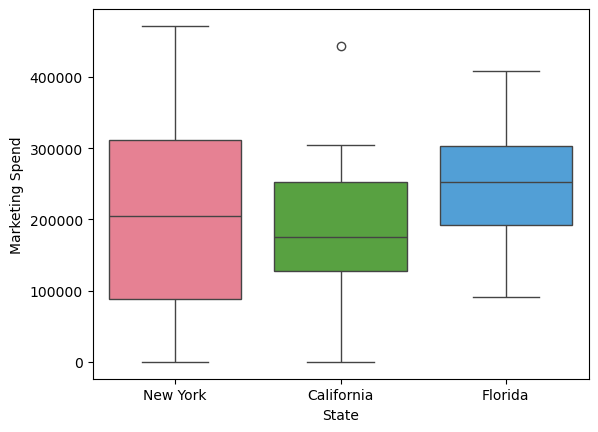

In [279]:
sns.boxplot(x='State', y = 'Marketing Spend', data=df, palette='husl')

<Axes: xlabel='State', ylabel='Profit'>

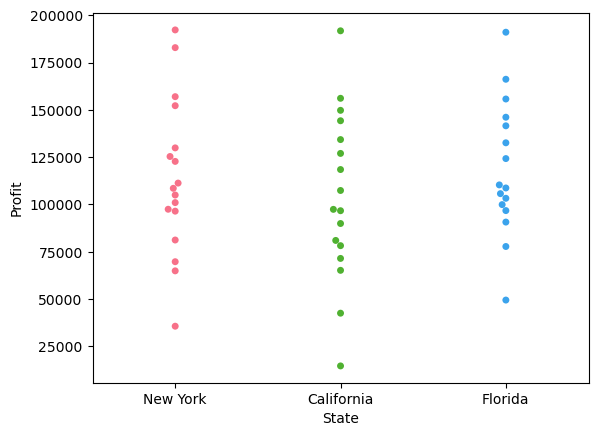

In [280]:
sns.swarmplot(x='State', y = 'Profit', data=df, palette='husl')

<Axes: xlabel='State', ylabel='Profit'>

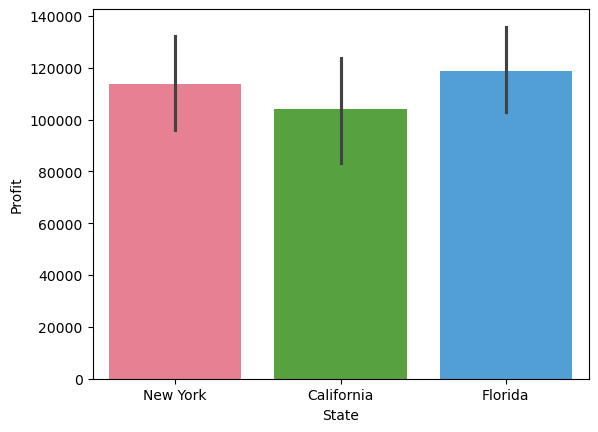

In [281]:
sns.barplot(x='State', y = 'Profit', data=df, palette='husl')

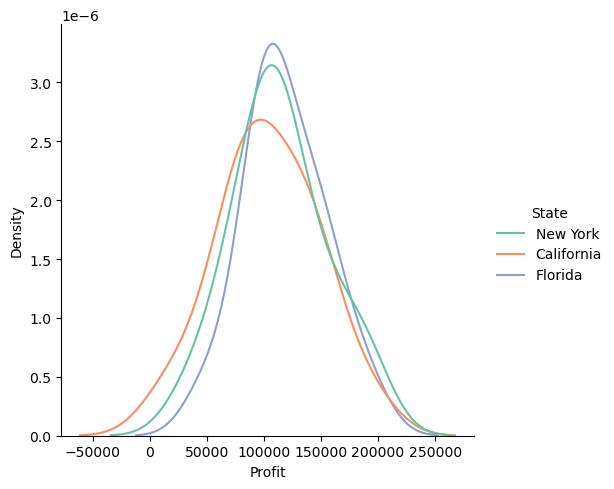

In [282]:
sns.displot(x='Profit', data=df, palette='Set2', kind='kde', hue='State')

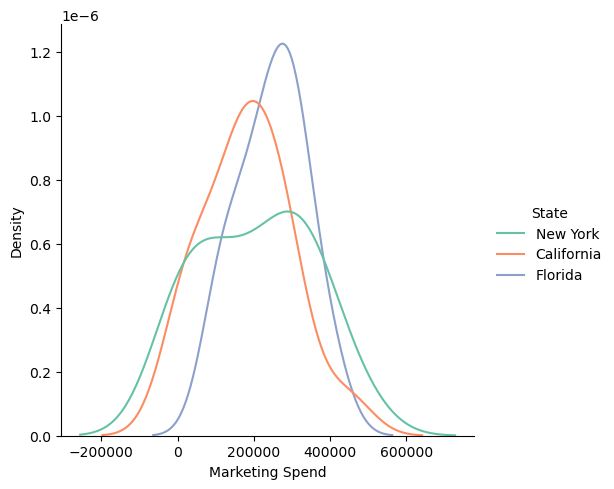

In [283]:
sns.displot(x='Marketing Spend', data=df, palette='Set2', kind='kde', hue='State')

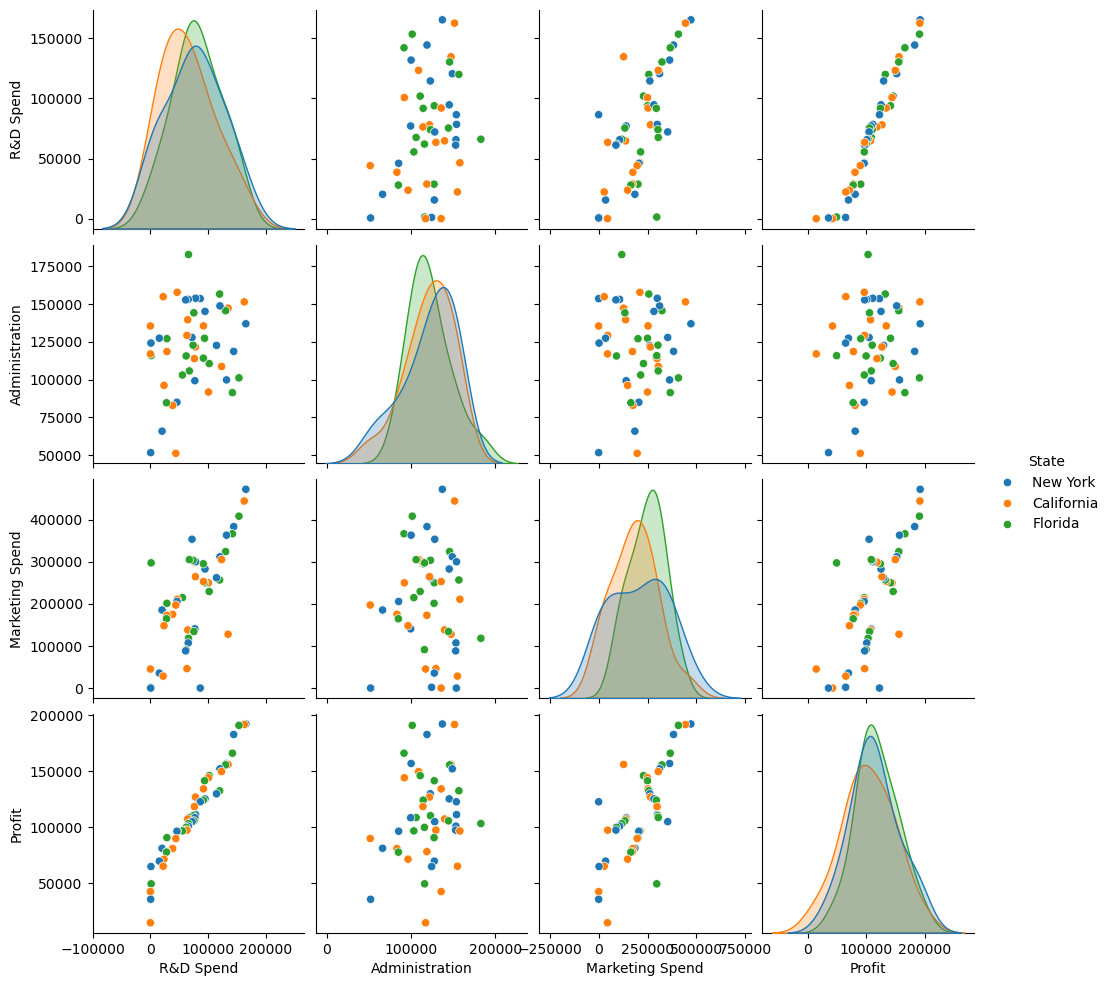

In [284]:
sns.pairplot(df, hue='State')

In [285]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

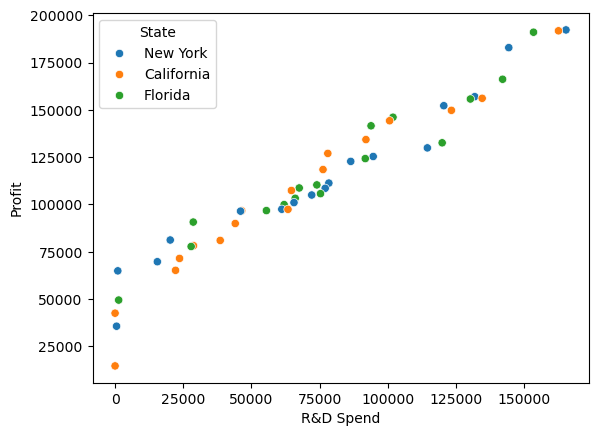

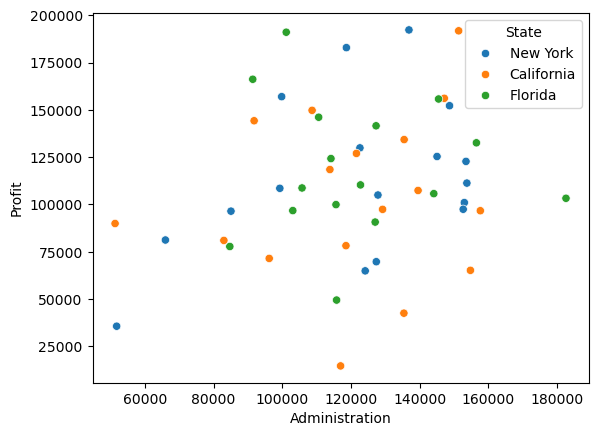

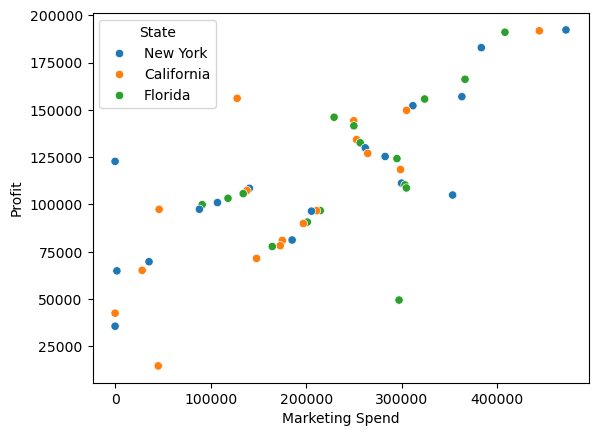

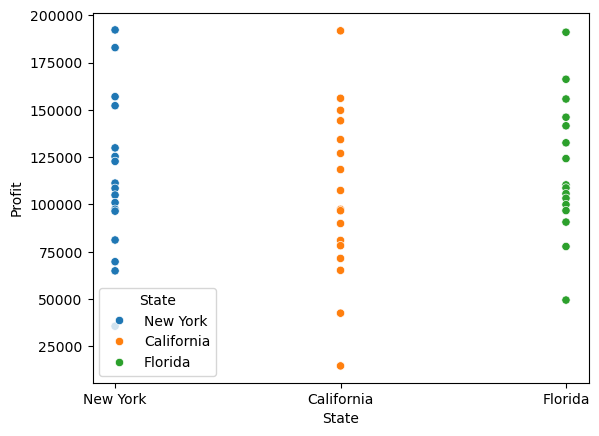

In [286]:
for i in x:
  sns.scatterplot(x=x[i], y=y, hue='State', data=df)
  plt.show()

<Axes: xlabel='State'>

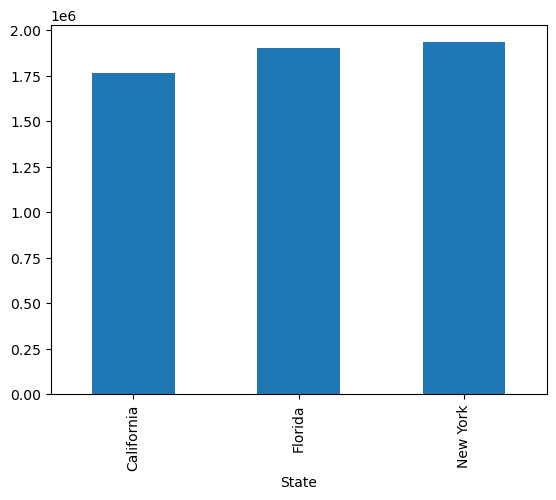

In [287]:
df.groupby(['State'])['Profit'].sum().plot.bar()

In [289]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x['State'] = encoder.fit_transform(x['State'])

In [290]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [291]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [292]:
y_pred = model.predict(x_test)
y_pred

array([ 74812.14788419,  45957.0185796 , 100411.9766159 , 155330.45180131,
       127314.44726377, 192299.43931389,  63830.29667314,  55714.63858572,
        84260.35472974, 110059.47662316])

In [293]:
y_test

36     90708.19
47     42559.73
28    103282.38
9     149759.96
13    134307.35
0     192261.83
44     65200.33
46     49490.75
39     81005.76
23    108733.99
Name: Profit, dtype: float64

In [294]:
model.coef_

array([ 8.10800557e-01, -4.47899103e-02,  2.68062532e-02, -1.51843070e+02])

In [295]:
model.intercept_

52022.77817967434

In [296]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4693.874119639424
Mean Squared Error: 40536050.436236605
R2 Score: 0.9794557471168575


In [297]:
AdjustedR2=1-((1-0.97)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
AdjustedR2

0.946

In [298]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))